KMeans Clustering

In [1]:
import random
import math
import json
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/SyedT1/Data-Mining-CSC417/main/Week%201/datasets/iris.data'
cols = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
df = pd.read_csv(path,names = cols)
print(df)
species = [i for i in set(df['Class'])]
species = species[::-1]
print(species)
df = df.drop('Petal Width',axis=1)
     


     Sepal Length  Sepal Width  Petal Length  Petal Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']


This is the pseudocode tolad Load data from file and save in the numpy matrix. 
You can use panda to read the dataset in to numpy matrix. data matrix will have data points. First column is point index. Rest of the columns have features.  ClassLabel has the labels.

In [3]:
def load(file_name):
    data = []
    class_label = []
    fh = open(file_name)
    for line in fh:
        line = line.strip().split(',')
        features = line[:-1]
        temp = [float(feature) for feature in features]
        class_label.append(line[-1])
        data.append(temp)
    fh.close()
    max_len = max(len(row) for row in data)
    data = [row + [0.0] * (max_len - len(row)) if len(row) < max_len else row for row in data]
    data = np.array(data)
    return data, class_label

In [4]:
def initialize_centroids_simple(data, dimension, k):
    centroids = np.zeros((k, dimension))
    random_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[random_indices]
    return centroids

In [5]:
def initialize_centroids(data, dimension, k):
    centroids = np.array([[0 for _ in range(dimension)] for _ in range(k)])
    max_feature_vals =  np.array([0 for _ in range(dimension)])
    min_feature_vals =  np.array([float('inf') for _ in range(dimension)])
    return centroids

In [6]:
def get_euclidean_distance(p1, p2):
    distance = np.linalg.norm(p1 - p2)
    return distance

In [7]:
def kmeans(data, dimension, k):
    N = np.size(data, 0)
    centroids = initialize_centroids_simple(data, dimension, k)
    cluster_affiliation = np.array([-1 for _ in range(N)])
    flag = True

    while flag:
        for i, point in enumerate(data):
            min_distance = float('inf')
            min_distance_index = None

            for cluster_index, centroid in enumerate(centroids):
                distance = get_euclidean_distance(centroid, point)
                if distance < min_distance:
                    min_distance = distance
                    min_distance_index = cluster_index

            if cluster_affiliation[i] != min_distance_index:
                cluster_affiliation[i] = min_distance_index

        new_centroids = np.zeros_like(centroids)
        cluster_point_count = np.zeros(k)

        for i in range(N):
            cluster_index = cluster_affiliation[i]
            new_centroids[cluster_index] += data[i]
            cluster_point_count[cluster_index] += 1

        empty_clusters = np.where(cluster_point_count == 0)[0]
        if len(empty_clusters) > 0:
            for cluster_index in empty_clusters:
                new_centroids[cluster_index] = initialize_centroids(data, dimension)
                cluster_point_count[cluster_index] = 1

        new_centroids = new_centroids / cluster_point_count[:, np.newaxis]
        new_centroids = new_centroids.astype(data.dtype)
        centroid_change = np.sum(np.abs(new_centroids - centroids))
        if centroid_change <= 1e-5 * np.sum(np.abs(centroids)):
            flag = False

        centroids = new_centroids

    return centroids, cluster_affiliation


[[5.006      3.418      1.464     ]
 [6.83902439 3.06341463 5.67804878]
 [5.86101695 2.73898305 4.36949153]]
150


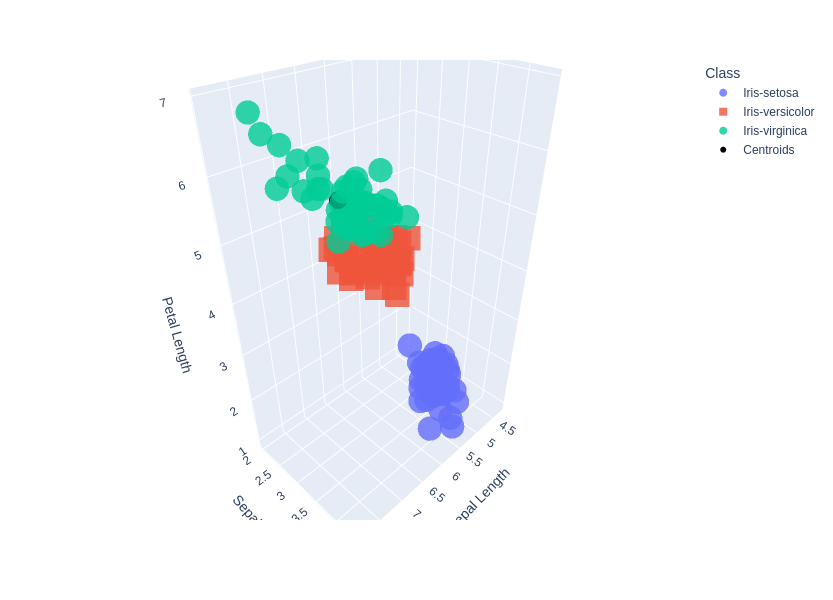

In [11]:
import numpy as np
import pandas as pd
import plotly.express as px

def load(input_filename):
    data = np.genfromtxt(input_filename, delimiter=',', dtype=float, usecols=(0, 1, 2, 3))
    class_label = np.genfromtxt(input_filename, delimiter=',', dtype=str, usecols=4)
    return data, class_label

def main():
    input_filename = 'iris.data'
    data, class_label = load(input_filename)

    dimension = data.shape[1]
    dimension = dimension - 1

    centroids, cluster_affiliation = kmeans(data[:, :dimension], dimension, 3)
    print(centroids)
    df = pd.DataFrame(data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
    df['Class'] = class_label
    fig = px.scatter_3d(df, x='Sepal Length', y='Sepal Width', z='Petal Length', color='Class',
                        symbol='Class', symbol_map={'Iris-setosa': 'circle', 'Iris-versicolor': 'square', 'Iris-virginica': 'circle'},
                        opacity=0.8, width=800, height=600)

    fig.add_scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], mode='markers',
                      marker=dict(color='black', symbol='circle', size=6), name='Centroids')

    fig.update_layout(scene=dict(xaxis_title='Sepal Length', yaxis_title='Sepal Width', zaxis_title='Petal Length'))

    fig.show()

if __name__ == "__main__":
    main()
